In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation

# Data Preprocessing

In [2]:
imgw = 64
imgh = 64
nb_train_samples = 8000
nb_test_samples = 2000
epochs = 25
batch_size = 40
input_shape = (64,64,3)

DNN_model_path = 'model/dnn_model.h5'
CNN_model_path = 'model/cnn_model.h5'
TARGET_IMAGE = 'dataset\Tungro\TUNGRO1_004.jpg'

In [3]:
main_path = 'dataset'
generator = ImageDataGenerator(rescale=1./255,
                               validation_split=0.2)

train_datagen = generator.flow_from_directory(main_path,
                                              target_size=(imgw,imgh),
                                              class_mode='categorical',
                                              batch_size=32,
                                              subset='training')

valid_datagen = generator.flow_from_directory(main_path,
                                              target_size=(imgw,imgh),
                                              class_mode='categorical',
                                              batch_size=16,
                                              subset='validation')

Found 4173 images belonging to 4 classes.
Found 1041 images belonging to 4 classes.


In [4]:
for data_batch, labels_batch in train_datagen:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break

Data batch shape: (32, 64, 64, 3)
Labels batch shape: (32, 4)


# DNN Model

In [5]:
def image_to_array(path):
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,)+x.shape)
    return x

## Make the model

In [11]:
from keras.models import Sequential, Model 
from keras.layers import Dropout, MaxPooling2D, Dense, Conv2D, Flatten 

In [35]:
Model = Sequential() # Initialising the Sequential Model ( DNN )

Model.add(Flatten()) # Flatten Layer

# First Layer
Model.add(Dense(units = 128, activation = 'relu',input_shape = input_shape))

# Second Layer
Model.add(Dense(units = 64, activation = 'relu'))

# Third Layer
Model.add(Dense(units = 32, activation = 'relu'))

# Dropout Layer
Model.add(Dropout(0.5))

# Fourth Layer
Model.add(Dense(units = 8, activation = 'relu'))

# Last Layer
Model.add(Dense(units = 4, activation = 'softmax'))

# Compile
Model.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [36]:
# Train
hist = Model.fit(
  train_datagen,
  epochs = epochs,
  validation_data = valid_datagen
)

Model.summary()

Epoch 1/25
131/131 [==============================] - 6s 41ms/step - loss: 0.6192 - accuracy: 0.3456 - val_loss: 0.5129 - val_accuracy: 0.4419
Epoch 2/25
131/131 [==============================] - 5s 39ms/step - loss: 0.5305 - accuracy: 0.4491 - val_loss: 0.4774 - val_accuracy: 0.5600
Epoch 3/25
131/131 [==============================] - 5s 39ms/step - loss: 0.4751 - accuracy: 0.5461 - val_loss: 0.4236 - val_accuracy: 0.6158
Epoch 4/25
131/131 [==============================] - 5s 39ms/step - loss: 0.4433 - accuracy: 0.5938 - val_loss: 0.4230 - val_accuracy: 0.6263
Epoch 5/25
131/131 [==============================] - 5s 39ms/step - loss: 0.4169 - accuracy: 0.6185 - val_loss: 0.3949 - val_accuracy: 0.6330
Epoch 6/25
131/131 [==============================] - 5s 39ms/step - loss: 0.3987 - accuracy: 0.6372 - val_loss: 0.3872 - val_accuracy: 0.6302
Epoch 7/25
131/131 [==============================] - 5s 39ms/step - loss: 0.3811 - accuracy: 0.6513 - val_loss: 0.3765 - val_accuracy: 0.6523

## Evaluating the Model
Training & Validation Accuracy Loss Chart

In [37]:
Model.evaluate(train_datagen)

131/131 [==============================] - 3s 22ms/step - loss: 0.1295 - accuracy: 0.9197


[0.1295238584280014, 0.9197220206260681]

In [40]:
import matplotlib.pyplot as plt

In [43]:
def plot_accuracy_loss_chart(history):
    
    epochs = [i for i in range(25)]
    fig , ax = plt.subplots(1,2)
    
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    
    fig.set_size_inches(20,10)
    
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    
    plt.show()

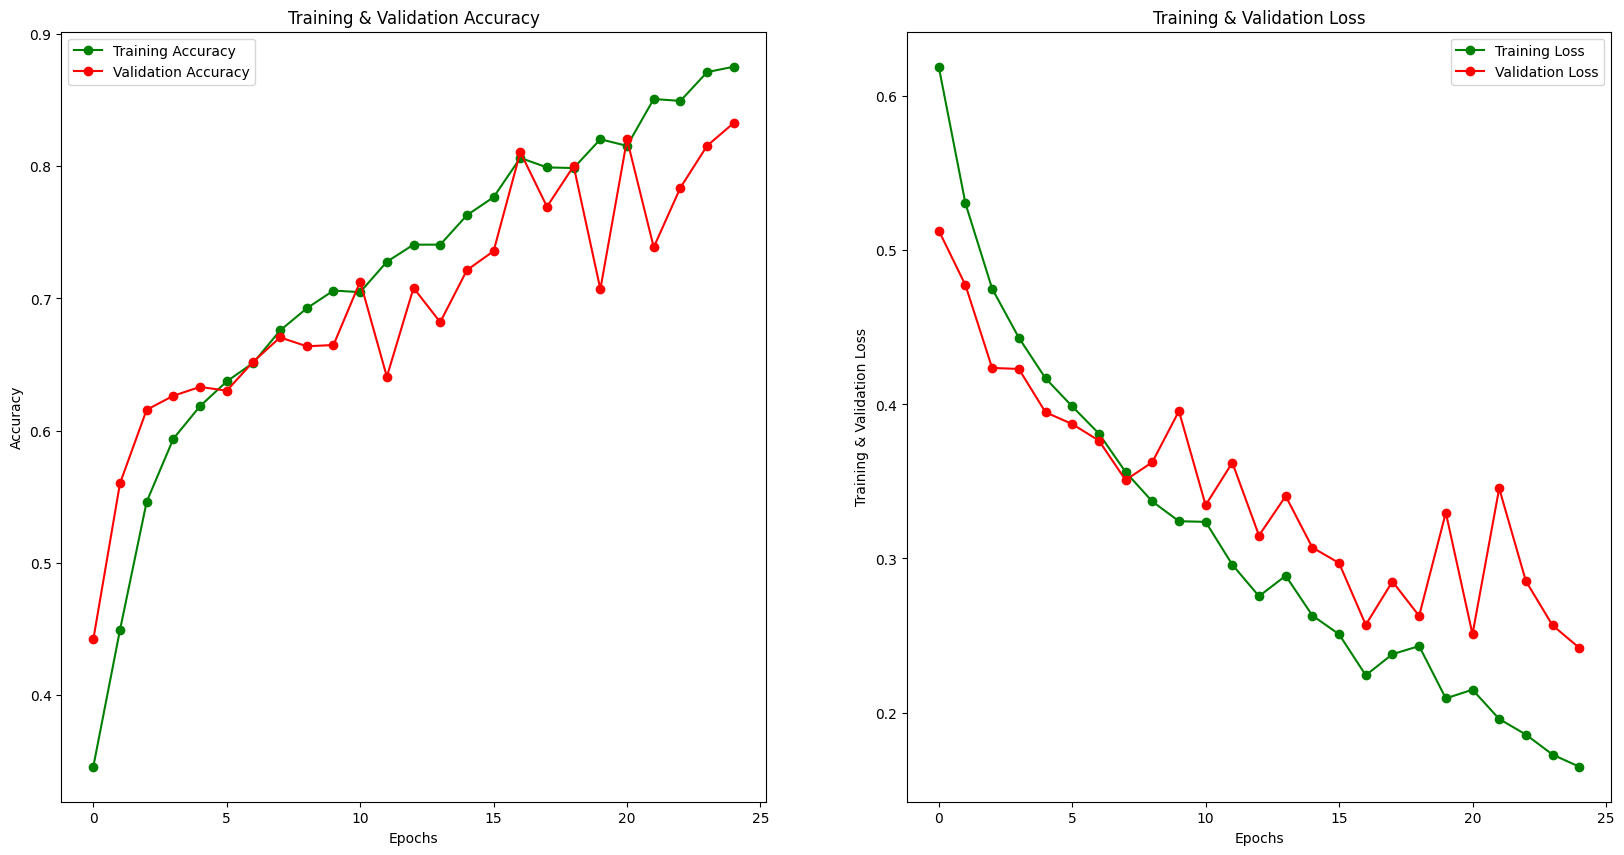

In [44]:
plot_accuracy_loss_chart(hist)

# CNN Model

In [ ]:
from tensorflow.keras.layers import Dropout, Activation, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
# Set up the model using TensorFlow/Keras
cnn_model = Sequential()
cnn_model.add(Conv2D(96, kernel_size=11, strides=4, activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=3, strides=2))
cnn_model.add(Conv2D(256, kernel_size=5, padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=3, strides=2))
cnn_model.add(Conv2D(384, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(Conv2D(384, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling2D((3,2), padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(4096, activation="relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(4096, activation="relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1000, activation="relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(4, activation="softmax"))
cnn_model.summary()

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 96)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 384)       

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
    
#     def on_epoch_end(self, epoch, logs={}):
#         if logs.get('val_accuracy') > 0.99:
#             self.model.stop_training = True
            
class myCallback(tf.keras.callbacks.Callback):
    def __init__(self, patience=10, delta=0.001, max_acc = 0.99):
        super(myCallback, self).__init__()
        self.patience = patience
        self.delta = delta
        self.wait = 0
        self.best_val_acc = -float('inf')
        self.max_acc = max_acc

    def on_epoch_end(self, epoch, logs={}):
        current_val_acc = logs.get('val_accuracy')
        if current_val_acc is None:
            return

        if current_val_acc > self.best_val_acc + self.delta:
            self.best_val_acc = current_val_acc
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True
                print("\nTraining stopped as val_accuracy did not improve for {} epochs.".format(self.patience))
            
        if logs.get('val_accuracy') >=  self.max_acc and logs.get('accuracy') >=  self.max_acc:
            self.model.stop_training = True
            

In [ ]:
callback = myCallback()
cnn_history = cnn_model.fit_generator(train_datagen,
          epochs=10,
          validation_data=valid_datagen,
          callbacks=callback)
cnn_history.save_weights(CNN_model_path)

: 

In [ ]:
cnn_model.evaluate(train_datagen)

149/149 [==============================] - 9s 63ms/step - loss: 1.3831 - accuracy: 0.2696


[1.383091926574707, 0.26964399218559265]

# History Plotting

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc_loss = [['accuracy', 'val_accuracy'],
            ['loss', 'val_loss']]

for i in acc_loss:
    
    plt.plot(dnn_model.history[i[0]], 'g-o')
    plt.plot(dnn_model.history[i[1]], 'b-+')
    plt.title(f'model {i[0]} and {i[1]}')
    plt.ylabel(f'{i[0]}')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    